In [2]:
import h5py
import pickle
import folium
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
with h5py.File('data/PEMS-BAY/pems-bay.h5', 'r') as file:

    axis0 = file['speed']['axis0'][:]               # Идентификаторы датчиков
    block0_items = file['speed']['block0_items'][:] # Идентификаторы датчиков
    axis1 = file['speed']['axis1'][:]               # Метки времени
    timestamps = pd.to_datetime(axis1)              # Преобразование меток времени в формат datetime
    speed_data = file['speed']['block0_values'][:]  # Данные замеров скорости

perms_bay = pd.DataFrame(speed_data, index=timestamps, columns=axis0)

In [4]:
# Открытие .pkl файла
with open('data/PEMS-BAY/adj_mx_bay.pkl', 'rb') as file:
    data = pickle.load(file, encoding='bytes')

In [5]:
node_ids = [x.decode('utf-8') for x in data[0]]                     # Получаем список id узлов из data[0]
adj_matrix = data[2]                                                # Получаем матрицу смежности из data[2]
adj_df = pd.DataFrame(adj_matrix, index=node_ids, columns=node_ids) # Создание DataFrame с использованием id узлов как индексов и названий колонок

In [23]:
adj_df.shape, perms_bay.shape

((325, 325), (52116, 325))

In [17]:
distances_df = pd.read_csv('data/PEMS-BAY/distances_bay_2017.csv', header=None)
locations_df = pd.read_csv('data/PEMS-BAY/graph_sensor_locations_bay.csv', header=None)

In [18]:
# Создание графа
G = nx.Graph()

# Добавление узлов с координатами
for _, row in locations_df.iterrows():
    node_id = row[0]
    x, y = row[1], row[2]
    G.add_node(str(int(node_id)), pos=(x, y))

# Добавление рёбер на основе матрицы смежности
for node1 in adj_df.index:
    for node2 in adj_df.columns:
        weight = adj_df.loc[node1, node2]
        if weight != 0 and node1 != node2:  # Добавляем ребро только если вес не равен 0
            G.add_edge(node1, node2, weight=weight)

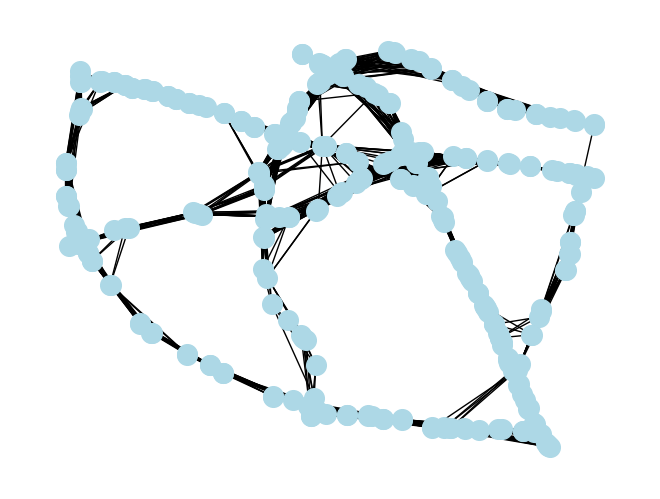

In [19]:
# Визуализация графа с использованием координат

pos = nx.get_node_attributes(G, 'pos')  # получаем координаты
nx.draw(G, pos, with_labels=False, node_size=200, node_color='lightblue', font_size=8)
plt.show()

In [ ]:
# Создаем карту Folium, центрируем её на одном из узлов
m = folium.Map(location=[37.359087, -121.906538], zoom_start=13)

# Добавляем узлы на карту
for node, data in G.nodes(data=True):
    folium.Circle(location=[data['pos'][0], data['pos'][1]], popup=str(node)).add_to(m)

# Добавляем рёбра на карту
for edge in G.edges(data=True):
    node1 = edge[0]
    node2 = edge[1]
    
    # Координаты двух узлов
    loc1 = G.nodes[node1]['pos']
    loc2 = G.nodes[node2]['pos']
    
    # Рисуем линию между узлами
    folium.PolyLine(locations=[(loc1[0], loc1[1]), (loc2[0], loc2[1])], color='blue', weight=2.5).add_to(m)

# Отображаем карту
# m.save('graph_map.html')
m

In [4]:
import torch

# Матрица Лапласиана для примера
laplacian = torch.tensor([
    [0.5, 0.4, 0.4, 0.0],
    [0.4, 0.5, 0.3, 0.3],
    [0.4, 0.3, 0.5, 0.3],
    [0.0, 0.4, 0.4, 0.5]
], dtype=torch.float32)

# Конкатенированная матрица (inputs и hidden_state) для примера
concatenation = torch.tensor([
    [1.0, 0.1, 0.2],
    [2.0, 0.2, 0.3],
    [3.0, 0.3, 0.4],
    [4.0, 0.4, 0.5]
], dtype=torch.float32)

# Вычисляем A * [inputs, hidden_state]
a_times_concat = laplacian @ concatenation
a_times_concat

tensor([[2.5000, 0.2500, 0.3800],
        [3.5000, 0.3500, 0.5000],
        [3.7000, 0.3700, 0.5200],
        [4.0000, 0.4000, 0.5300]])

### Подготовка данных

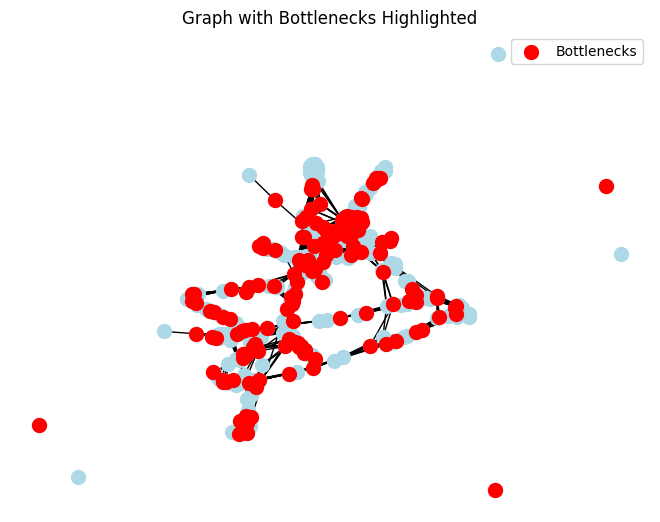

Собственные значения лапласиана: [-3.04503029e-15 -2.92748835e-15 -1.85280028e-15  0.00000000e+00
  0.00000000e+00  1.57669204e-15  2.88538094e-15  2.94839394e-02
  4.90419085e-02  5.57794917e-02  9.58247486e-02  1.07661557e-01
  1.14726195e-01  1.31076285e-01  1.58973247e-01  2.03139725e-01
  2.18751927e-01  2.37232604e-01  2.70632823e-01  3.08260120e-01
  3.37932472e-01  4.57923320e-01  4.78982344e-01  5.33972597e-01
  5.53406823e-01  6.46281712e-01  6.67669356e-01  7.08089822e-01
  7.22410178e-01  7.59694151e-01  8.20950440e-01  8.76380661e-01
  1.07180744e+00  1.09315738e+00  1.20308419e+00  1.22645296e+00
  1.31012163e+00  1.40849077e+00  1.46469671e+00  1.61706534e+00
  1.69874906e+00  1.73902557e+00  1.80367217e+00  1.93258397e+00
  1.97496867e+00  2.09951417e+00  2.15033801e+00  2.15589762e+00
  2.23659490e+00  2.38126534e+00  2.40538644e+00  2.46939647e+00
  2.56608345e+00  2.64751942e+00  2.67110411e+00  2.74154663e+00
  2.78658973e+00  2.91233853e+00  3.01154960e+00  3.19176

In [20]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Преобразуем в граф
adj_df_copy = adj_df - np.eye(adj_df.shape[0])
G = nx.from_pandas_adjacency(adj_df_copy)

# 2. Вычисляем лапласиан
laplacian_matrix = nx.laplacian_matrix(G).toarray()

# 3. Находим собственные значения и векторы
eigvals, eigvecs = np.linalg.eigh(laplacian_matrix)

# 4. Визуализация графа и узких мест
def plot_graph_with_bottlenecks(G, eigvec):
    # Узкие места: выбираем вершины с минимальными значениями второго собственного вектора
    bottleneck_nodes = [n for n, val in zip(G.nodes, eigvec) if val < 0]

    # Рисуем граф
    pos = nx.spring_layout(G)  # Используем весеннюю раскладку
    nx.draw(G, pos, with_labels=False, node_color="lightblue", node_size=100, font_size=10)
    
    # Выделяем узкие места
    nx.draw_networkx_nodes(G, pos, nodelist=bottleneck_nodes, node_color="red", node_size=100, label="Bottlenecks")
    plt.legend()
    plt.title("Graph with Bottlenecks Highlighted")
    plt.show()

# Используем второй собственный вектор (eigvecs[:, 1])
plot_graph_with_bottlenecks(G, eigvecs[:, 0])

# 5. Выводим собственные значения
print("Собственные значения лапласиана:", eigvals)

In [18]:
eigvecs.shape

(325, 325)

In [15]:
pd.DataFrame(laplacian_matrix)

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,13.184235,0.000000,-0.614808,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,15.918851,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,-0.614808,0.000000,10.421715,0.0,-0.23919,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.934109,0.000000,0.000000,0.000000,0.000000
321,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,9.464030,-0.919411,-0.992086,-0.839492
322,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-0.919411,9.990215,-0.960509,-0.606066
323,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-0.992086,-0.960509,9.776977,-0.773025
